In [6]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle as plk
import importlib.util
from numpy.lib.scimath import sqrt as csqrt
from IPython.display import display, Math

###############################################################
#LINUX PATH

# sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
# import lumapi
# sys.path.append(os.path.dirname('/media/leonardo/datam02/Ring Resonator - Leonardo Pessôa/Ring-Resonator/Tutorial/')) #Current directory

###############################################################
# WINDOWS PATH

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname('D:/AAAAAAAArquivos/Facul/Capacitação/GitHub/BraggGrating'))
spec_win.loader.exec_module(lumapi)

# Python Theoretical Graphics

In [7]:
# Constants
lambda_d = 1550e-9
pi = np.pi
c0 = 299792458
neff = 1.447
k0 = 2*pi/lambda_d

band = np.linspace(1545*1e-9, 1555*1e-9, 20000)
Cband = np.linspace(1530*1e-9, 1565*1e-9, 20000)

beta = (neff*2*pi)/Cband

In [8]:
# Parameters
L = 1e-3
rmax = 0.8

# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

sigma = detuning + couplingSigma
k = np.arctanh(np.sqrt(rmax))/L

#Reflection
r = (np.sinh(csqrt((k**2 - sigma**2))*L)**2)/((np.cosh(csqrt((k**2 - sigma**2))*L)**2) - ((sigma**2)/(k**2)))

#Transmission 
T = 1 - r

C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


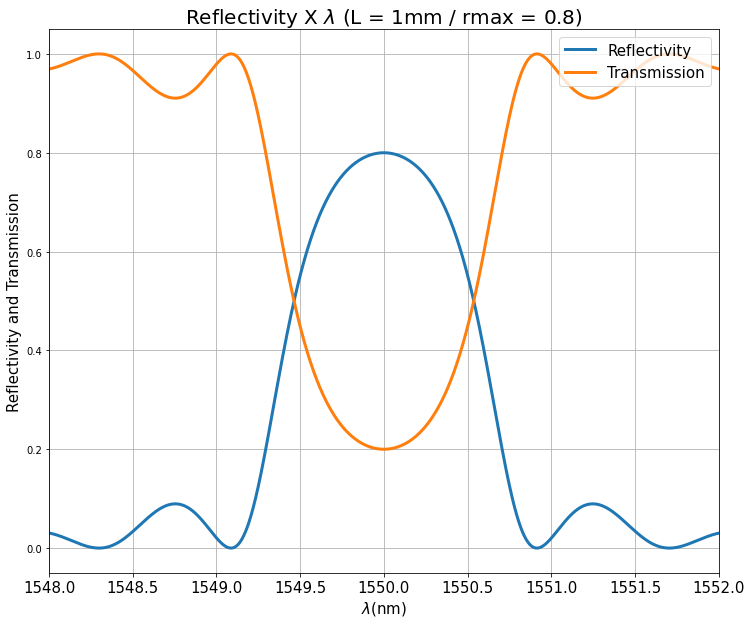

In [9]:
figure1 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm / rmax = 0.8)', size = 20)
plt.ylabel('Reflectivity and Transmission', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1548,1552)

plt.plot(band*1e9, r, label = 'Reflectivity', linewidth = 3)
plt.plot(band*1e9, T, label = 'Transmission', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure1.savefig('figure1.png')

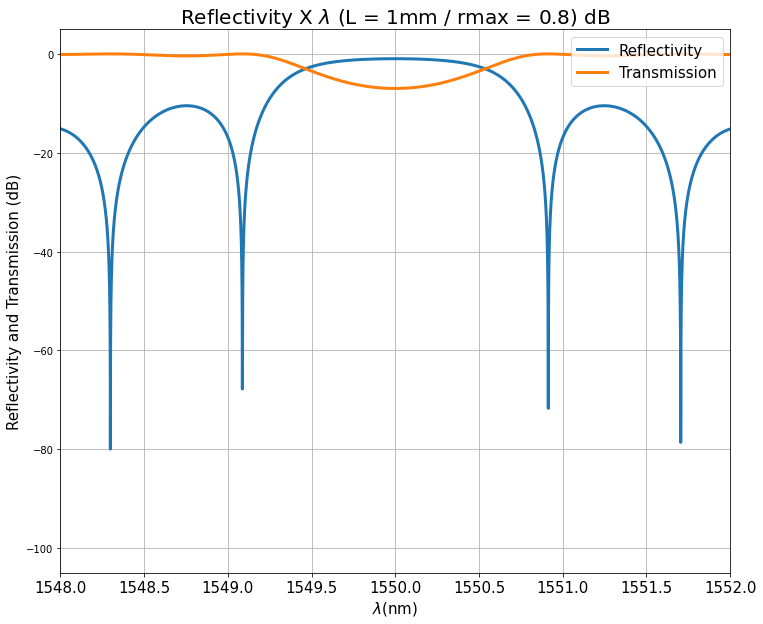

In [10]:
figure2 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm / rmax = 0.8) dB', size = 20)
plt.ylabel('Reflectivity and Transmission (dB)', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1548,1552)

plt.plot(band*1e9, 10*np.log10(r), label = 'Reflectivity', linewidth = 3)
plt.plot(band*1e9, 10*np.log10(T), label = 'Transmission', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure2.savefig('figure2.png')

In [11]:
# Parameters diferent k*L values
L = 1e-3

# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

sigma = detuning + couplingSigma
kL2 = 2/L
kL8 = 8/L

#Reflection
rkL2 = (np.sinh(csqrt((kL2**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kL2**2 - sigma**2))*L)**2) - ((sigma**2)/(kL2**2)))
rkL8 = (np.sinh(csqrt((kL8**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kL8**2 - sigma**2))*L)**2) - ((sigma**2)/(kL8**2)))

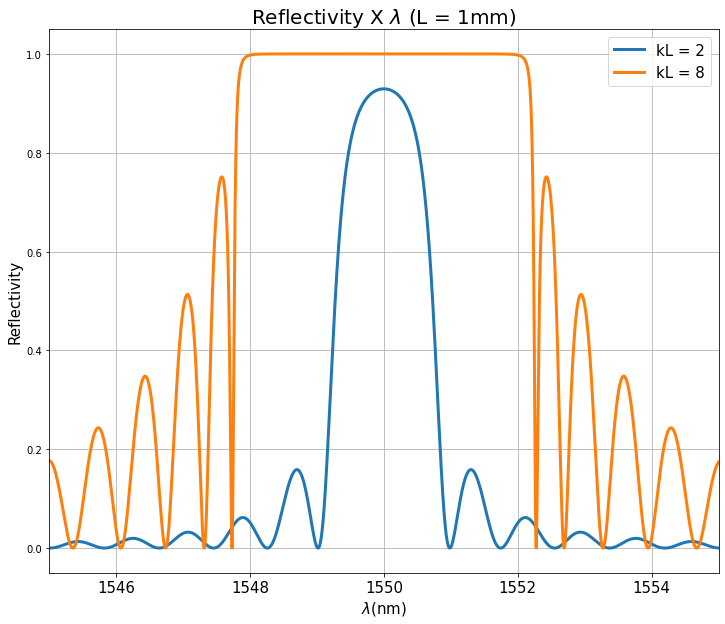

In [12]:
figure3 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1545,1555)

plt.plot(band*1e9, rkL2, label = 'kL = 2', linewidth = 3)
plt.plot(band*1e9, rkL8, label = 'kL = 8', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure3.savefig('figure3.png')

In [13]:
# Using the Theoredical value of 1.64
L = 1e-3

# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

sigma = detuning + couplingSigma
kTheory = 1.64/L
print('k Theoretical Value = ', kTheory)

#Reflection
rTheory = (np.sinh(csqrt((kL2**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kL2**2 - sigma**2))*L)**2) - ((sigma**2)/(kL2**2)))

k Theoretical Value =  1639.9999999999998


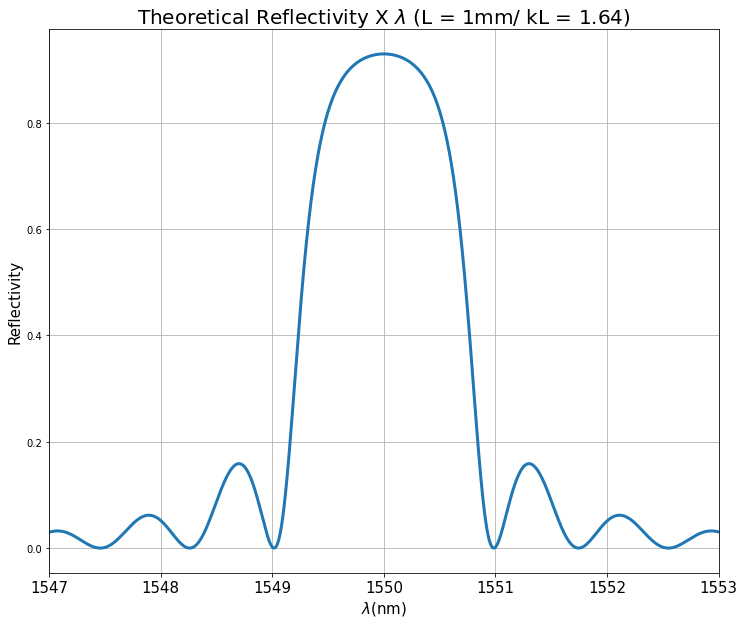

In [21]:
figure4 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Theoretical Reflectivity X $\lambda$ (L = 1mm/ kL = 1.64)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1547,1553)
plt.plot(band*1e9, rTheory, linewidth = 3)

figure4.savefig('figure4.png')

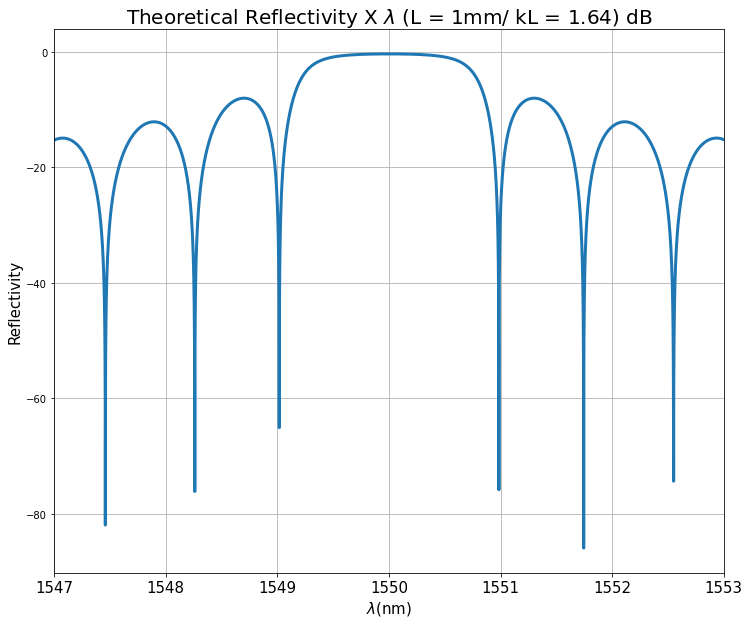

In [22]:
figure5 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Theoretical Reflectivity X $\lambda$ (L = 1mm/ kL = 1.64) dB', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1547,1553)
plt.plot(band*1e9, 10*np.log10(rTheory), linewidth = 3)

figure5.savefig('figure5.png')

# Interconnect Integration

In [68]:
icp = lumapi.INTERCONNECT('Interconnect_Integration.icp')

In [66]:
icp.switchtodesign()
icp.deleteall()

In [69]:
icp.addelement("Optical Network Analyzer")
icp.set("name", "ONA_1")
icp.set("number of input ports", 2)
icp.set("input parameter", "start and stop")
icp.set("start frequency", c0/Cband[0])
icp.set("stop frequency", c0/Cband[-1])
icp.set("number of points", 1e4)

In [70]:
# Adding Bragg Grating
icp.addelement("Bragg Grating")
icp.set('length', 1e-3)

In [19]:
#Setting up the theoretical values in the interconnect Component
dn_ac = kTheory*lambda_d/pi
print('Effective index change ac = ', dn_ac)

Effective index change ac =  0.0008091437306791958


In [85]:
# Getting Interconnect Results
#icp.run()
result_ona_gain = icp.getresult('ONA_1','input 1/mode 1/gain')
result_ona_transmission = icp.getresult('ONA_1','input 1/mode 1/transmission')

wavelength = result_ona_gain['wavelength']
gain = result_ona_gain['TE gain (dB)']
transmission = result_ona_transmission['TE transmission']

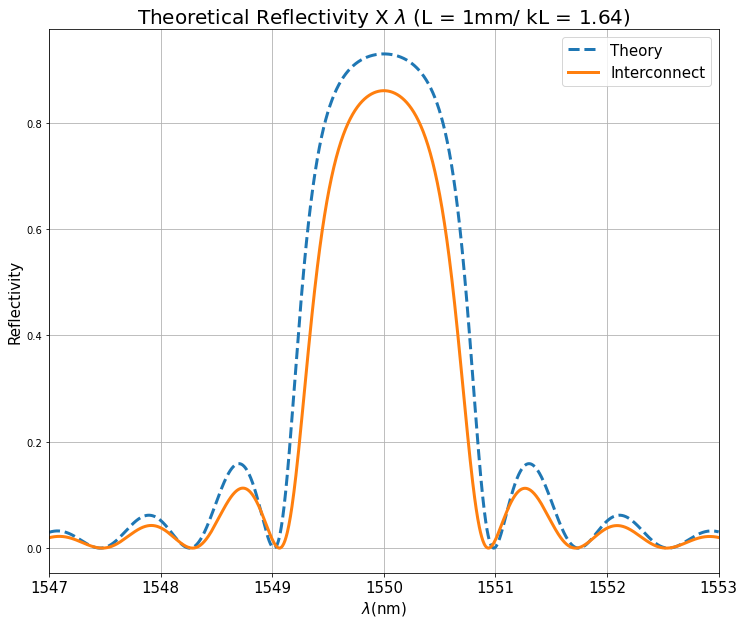

In [86]:
figure6 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Theoretical Reflectivity X $\lambda$ (L = 1mm/ kL = 1.64)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1547,1553)
plt.plot(band*1e9, rTheory, '--', linewidth = 3, label = 'Theory')
plt.plot(wavelength*1e9, abs(transmission)**2, linewidth = 3, label = 'Interconnect')
plt.legend(loc = 'upper right', prop = {'size': 15})


figure6.savefig('figure6.png')

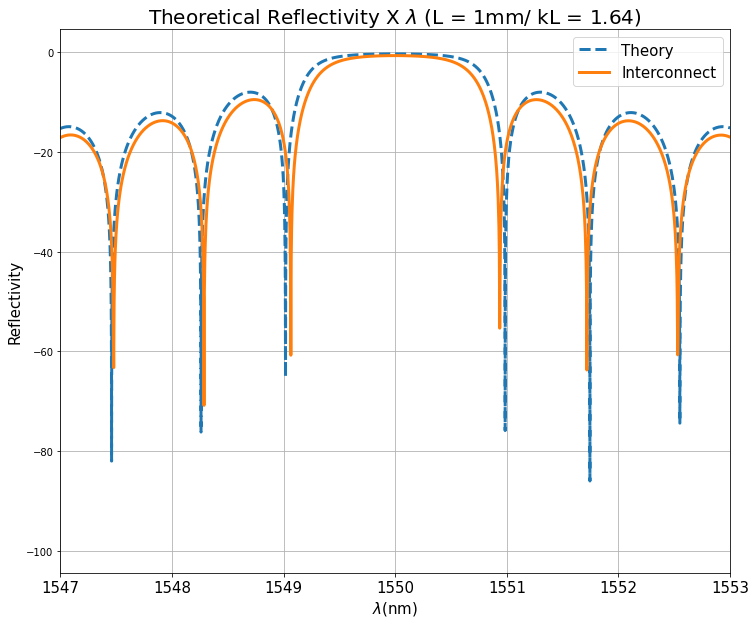

In [87]:
figure7 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Theoretical Reflectivity X $\lambda$ (L = 1mm/ kL = 1.64)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1547,1553)
plt.plot(band*1e9, 10*np.log10(rTheory), '--', linewidth = 3, label = 'Theory')
plt.plot(wavelength*1e9, gain, linewidth = 3, label = 'Interconnect')
plt.legend(loc = 'upper right', prop = {'size': 15})


figure7.savefig('figure7.png')

In [23]:
icp.switchtodesign()
icp.save()
icp.close()